# Question 1

The first thing I did to tackle this question was to simulate the randomisation of the order of the queue and the seating position. I then devised a way to check for aisle and seat interference through the use of the np.floor function and the modulus operator to calculate the row and column of each invidiual seat, assuming that the layout of the airplane is 4 seats-AISLE-4 seats. 

My first initial simulation was purely to calculate the average time it took each person to board and find their seat. I then expanded this out to simulate the boarding of 100 passengers across 1000 planes to get the average time and standard deviation for the total boarding. 

I must admit that I recognise that my model has problems such as the fact that in this model 1 boarding of a passenger is done at one time leading to a ridiculously high total boarding time of +2hrs, however I could not come up with a suitable way of implementing this. I tried to edit my program to alow for parallel boardings with a time gap between however I could not do this and struggled to think of how to implement it. 

I struggled with this question a lot because I was unsure what it was asking us to do.I assumed that we simulate over many different planes boarding 100 people. My programming skills aren't the best and I would have found the analytical version of this problem much more to my taste. Most of my time was spent trying to implement parallel boarding into my model. A simulation with time steps as mentioned in the question of the exercise probably would have made more sense, however how to implement this if you loop over until every seat is taken how then can you implement interferences and the distance/velocities? 

[11, 42, 76, 44, 89, 13, 77, 70, 98, 41, 87, 19, 81, 97, 96, 21, 12, 16, 28, 45, 7, 61, 30, 75, 35, 82, 59, 94, 92, 40, 5, 52, 95, 23, 62, 31, 57, 49, 73, 15, 3, 66, 22, 74, 60, 34, 27, 69, 85, 20, 54, 71, 83, 47, 2, 64, 86, 25, 46, 38, 79, 68, 90, 93, 29, 26, 32, 65, 91, 78, 6, 53, 48, 24, 56, 99, 51, 33, 58, 37, 63, 67, 80, 10, 72, 50, 88, 14, 1, 0, 36, 8, 4, 18, 9, 17, 84, 43, 39, 55]
Avg time to Board and find seat is 142 seconds
Std Dev is 37 seconds


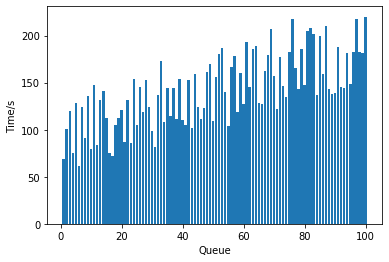

In [18]:
import numpy as np
import scipy as sci 
from matplotlib import pyplot as plt 
import random
from random import choice
import sys


#init
airplane = []
random.seed(random.randint(1,25000))

seatstaken = 0
N = 100 #number of people
if N % 4 != 0:
    print('ERROR: N not divisible by 4.')
    sys.exit()
seats = np.zeros(N)
times = np.zeros(N)
velocity = 0.5 #0.5 m/s speed
distance = 25 #25m from gate (first person) to first seat row (seat no 1,2,3,4)
queuedist = 0.5 #0.5m between people in boarding queue
rowdist = 1 #1m between seat rows 
#so it takes (25m + (0.5*arrayindex) + (1*rowindexnumber)) * 0.5m/s time to get from queue pos to seat row
#var form: (distance + (queuedist * i) + (rowdist * rownumber starting from 0)) * velocity 
# + 30s for aisle interference 
# if person[i]_row > person[i-1]_row then +30s 
# + 15 secs for seat interference 
# if person[i] and person[i-1] == same row and person[i-1] in column 2 or 3 then + 15s

#constructing airplane
for i in range (0,N):
    airplane.append(i)

queue = []
j=1
while j < N+1: #randomisizing the queue
    p = random.randint(1,N)
    if p not in queue:
        queue.append(p)
        j+=1
        
        
r= random.sample(range(0,N),N)
print(r)
for i in range(0,N):
    #r = random.randint(0,N-1)
    #s = random.randrange(0,11)
    #print(r[i])
    #seats[r] = queue[i]
    times[i] = times[i] + ((distance +(queuedist*i)+(rowdist * np.floor(r[i]/4)))/ velocity)
    if seats[r[i]] == 0:
        seats[r[i]] = queue[i]
   # print('Person %d is assigned to seat %d. Column %d, Row %d' % (queue[i], r[i]+1,(r[i] % 4)+1, np.floor(r[i]/4)+1))
    if np.floor(r[i]/4) > np.floor(r[i-1]/4):
        times[i]= times[i] + 30
        #print('Aisle Interference')
    if np.floor(r[i]/4) == np.floor(r[i-1]/4) and (r[i] %4) == 2 or (r[i] %4) == 3:
        times[i] = times[i] +15
        #print('Seat Interference')





    

#print(airplane)
#print(random.randint(1,25))
#print(choice(airplane))
#print('QUEUE') 
#print(queue)
#print('SEATS')
#print(seats)
#print('TIMES')
#print(times)
print('Avg time to Board and find seat is %d seconds' %(np.mean(times)))
print('Std Dev is %d seconds' %(np.std(times)))


plt.bar(np.sort(queue), times)
plt.xlabel('Queue')
plt.ylabel('Time/s')
#count, bins, ignored = plt.hist(times,100,density=True)
plt.show()
#print(queue[0])
#print(len(lis))
#for i in range(1,101):
#    print('i = %d count = %d'% (i, lis.count(i)))
#for i in range(0,100):
    #print('Seat %d is assigned to person %d. Person %d is in column %d row %d'% (i+1, lis[i],lis[i], (i % 4)+1, np.floor(i/4)+1 ))

# Simulation over 1000 planes with 100 passengers boarding

In [17]:
import numpy as np
import scipy as sci 
from matplotlib import pyplot as plt 
import random
from random import choice
import sys


#init
airplane = []
random.seed(random.randint(1,25000))

seatstaken = 0
AI=0
SI=0
S = 1000 #1000 boarding sims
N = 100 #number of people
if N % 4 != 0:
    print('ERROR: N not divisible by 4.')
    sys.exit()
seats = np.zeros(N)
times = np.zeros(N)
Totaltime =0
Avgtime = 0
Stdtime=0
totaltimes = np.zeros(S)
Avgtimes = np.zeros(S)
Stdtimes = np.zeros(S)
velocity = 0.5 #0.5 m/s speed
distance = 25 #25m from gate (first person) to first seat row (seat no 1,2,3,4)
queuedist = 0.5 #0.5m between people in boarding queue
rowdist = 1 #1m between seat rows 
#so it takes (25m + (0.5*arrayindex) + (1*rowindexnumber)) * 0.5m/s time to get from queue pos to seat row
#var form: (distance + (queuedist * i) + (rowdist * rownumber starting from 0)) * velocity 
# + 30s for aisle interference 
# if person[i]_row > person[i-1]_row then +30s 
# + 15 secs for seat interference 
# if person[i] and person[i-1] == same row and person[i-1] in column 2 or 3 then + 15s

#constructing airplane
for i in range (0,N):
    airplane.append(i)

queue = []
j=1
while j < N+1: #randomisizing the queue
    p = random.randint(1,N)
    if p not in queue:
        queue.append(p)
        j+=1
        
        
print(queue)
#print(r)
k = 0
while k < S:
    
    for i in range(0,N):
        r= random.sample(range(0,N),N)
        times[i] += (i*queuedist)/velocity +(distance / velocity) + (rowdist * np.floor(r[i]/4))/velocity #time to get to seat row 
        if np.floor(r[i]/4) > np.floor(r[i-1]/4):
            times[i]= times[i] + 30
            #print('Aisle Interference')
            AI += 1
        if np.floor(r[i]/4) == np.floor(r[i-1]/4) and (r[i] %4) == 2 or (r[i] %4) == 3:
            times[i] = times[i] +15
            #print('Seat Interference')
            SI +=1
        #print(Totaltime)
       
    Totaltime = np.sum(times) #total time per plane for all passengers to board and find a seat 
    Avgtime = np.mean(times) #avg time for a person to board and find seat
    Stdtime = np.std(times) #std for person to board and find seat
    times = np.zeros(N)
    totaltimes[k] = Totaltime
    Avgtimes[k] = Avgtime
    Stdtimes[k] = Stdtime

    #print('Total time to board plane %d: %f seconds' %(k,Totaltime))
    #print('Total time to board plane %d: %f mins' %(k,Totaltime/60))
    #print('Total time to board plane %d: %f hours' %(k,Totaltime/3600))
    
        
     
    #print(k)
    k+=1
        
print('SIM FOR %d PEOPLE BOARDING %d PLANES' %(N, S))
#print(totaltimes)
print('Average total boarding time:%f seconds or %f hours' % (np.mean(totaltimes),np.mean(totaltimes)/3600 ))
print('Standard Deviation in total boarding time:%f seconds or %f hours' % (np.std(totaltimes), np.std(totaltimes)/3600))
print('Average time for passenger to board and find seat is %f seconds' %(np.mean(Avgtimes)))
print('Standard deviation in time taken for a person to board and find a seat is: %f seconds' %(np.mean(Stdtimes)))
    



[19, 97, 48, 73, 10, 26, 35, 2, 54, 18, 14, 6, 11, 66, 59, 45, 33, 95, 27, 78, 98, 57, 41, 60, 99, 46, 4, 28, 80, 87, 92, 91, 30, 89, 24, 39, 70, 8, 50, 93, 7, 56, 1, 96, 81, 77, 36, 23, 72, 61, 79, 65, 84, 90, 38, 63, 37, 53, 49, 88, 58, 44, 100, 76, 20, 62, 21, 40, 47, 52, 94, 55, 22, 69, 51, 25, 74, 32, 3, 71, 43, 42, 85, 15, 12, 5, 64, 34, 29, 13, 16, 17, 83, 31, 67, 9, 75, 68, 86, 82]
SIM FOR 100 PEOPLE BOARDING 1000 PLANES
Average total boarding time:14185.988000 seconds or 3.940552 hours
Standard Deviation in total boarding time:275.575877 seconds or 0.076549 hours
Average time for passenger to board and find seat is 141.859880 seconds
Standard deviation in time taken for a person to board and find a seat is: 39.221809 seconds


generating toy 0
generating toy 1
generating toy 2
generating toy 3
generating toy 4
generating toy 5
generating toy 6
generating toy 7
generating toy 8
generating toy 9
generating toy 10
generating toy 11
generating toy 12
generating toy 13
generating toy 14
generating toy 15
generating toy 16
generating toy 17
generating toy 18
generating toy 19
generating toy 20
generating toy 21
generating toy 22
generating toy 23
generating toy 24
generating toy 25
generating toy 26
generating toy 27
generating toy 28
generating toy 29
generating toy 30
generating toy 31
generating toy 32
generating toy 33
generating toy 34
generating toy 35
generating toy 36
generating toy 37
generating toy 38
generating toy 39
generating toy 40
generating toy 41
generating toy 42
generating toy 43
generating toy 44
generating toy 45
generating toy 46
generating toy 47
generating toy 48
generating toy 49
generating toy 50
generating toy 51
generating toy 52
generating toy 53
generating toy 54
generating toy 55
ge

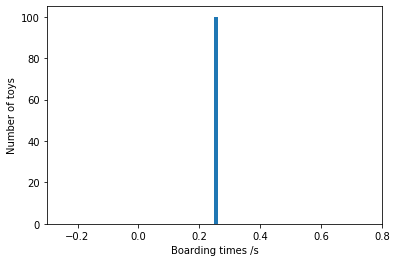

In [3]:
import random
import matplotlib.pyplot as plt 
import numpy as np 

#plane seating parameters 
num_rows = 25
num_cols = 4

#simple position timing container 

class Passenger: 
    _busy_time = 0. 
    def __init__(self, seat, pos):
        self.position = pos
        self.seat = seat 
    #a printout method for debugging 
    def __repr__(self):
        return 'Passenger with seat {} at position {}' .format(self.seat, self.position)
    #is the passenger busy?
    def busy(self):
        return self._busy_time > 0.
    #pos calculation 
    def row(self):
        return int(self.seat/num_cols)
    def column(self):
        return self.seat % num_cols 
    #steppers
    def tick(self, time_step):
        self._busy_time -= time_step 
    def delay(self,delay):
        self._busy_time += delay 
    def advance(self,step):
        self.position += step 

#containers for all system parameters 
class Parameters: 
    gate_pos = -25 #distance between gate and first row in meters 
    pass_distance = 0.5 #initial distance between passengers in the queue 
    pass_speed = 0.5 #passengers move 0.5 m/s 
    seat_distance = 1. 
    delay_aisle = 30. 
    delay_swap = 15.
    time_step = 0.25

#boarding time generator 
def boarding_time(pars):
    #generating random seat assignment 
    num_passengers = num_rows * num_cols #assuming a 100% saturation 
    seats_attrib = random.sample(range(num_passengers), k=num_passengers)

    #passenger queue 
    boarding = [] 
    i =0
    for seat_num in seats_attrib:
        distance_from_first_row = pars.gate_pos-i*pars.pass_distance 
        boarding.append(Passenger(seat_num, distance_from_first_row))
        i +=1

    #starting boarding 
    clock = 0. 
    occupied_seats = []
    prev_passenger = boarding[0] 
    iter_dist = pars.pass_speed*pars.time_step
    while len(boarding) > 0:
        clock += pars.time_step
        for passenger in boarding: 
            if passenger.busy():
                passenger.tick(pars.time_step)
            else:
                if passenger.position == passenger.row()*pars.seat_distance:
                    #if in correct row passenger stops 
                    occupied_seats.append(passenger.seat)
                    boarding.remove(passenger)
                    continue
            if prev_passenger == boarding[0]:
                passenger.advance(iter_dist)
            if prev_passenger.position-passenger.position-iter_dist >= pars.pass_distance:
                passenger.advance(iter_dist)
            if passenger.position == passenger.row()*pars.seat_distance:
                passenger.delay(pars.delay_aisle)
                if passenger.column() == 0 and passenger.row()*num_cols+1 in occupied_seats:
                    passenger.delay(pars.delay_swap)
                if passenger.column() == 3 and passenger.row()*num_cols+1 in occupied_seats: 
                    passenger.delay(pars.delay_swap)
            
            prev_passenger = passenger
        return clock 

times = []
params = Parameters()
for i in range(100):
    times.append(boarding_time(params))
    print('generating toy {}' .format(i))

print('Mean time (s):', np.mean(times))
print('Standard deviation (s):', np.std(times))

#plots
counts, xbins, image = plt.hist(times, bins =100, label=['Boarding times'])
plt.xlabel('Boarding times /s')
plt.ylabel('Number of toys')
plt.show()